# Decision tree to help identify patients with diabetes based on provided clinical variables.

In [77]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
#Q1.
# Import the diabetes dataset
data = pd.read_csv('diabetes.csv')

In [79]:
# Examine the variables
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [80]:
# Descriptive statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [81]:
# Visualize the distribution of variables. Due to an error called "Request Entity Too Large," I am commenting out the following lines of code intended for visualization to comprehend the distribution and relationships between the variables.
# sns.pairplot(data, hue='Outcome',diag_kind='kde')
# plt.show()

In [82]:
# Q2.

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [83]:
# From the descriptive statistics we conducted on this dataset during question 1, it is observed that several data entries for columns such as Pregnancies, Glucose, Blood Pressure, SkinThickness, Insulin, and BMI contain a value of "0". 

# Let's straightforwardly replace these values with their respective mean values.

In [84]:
data['Pregnancies'] = data['Pregnancies'].replace(0,data['Pregnancies'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

<AxesSubplot: >

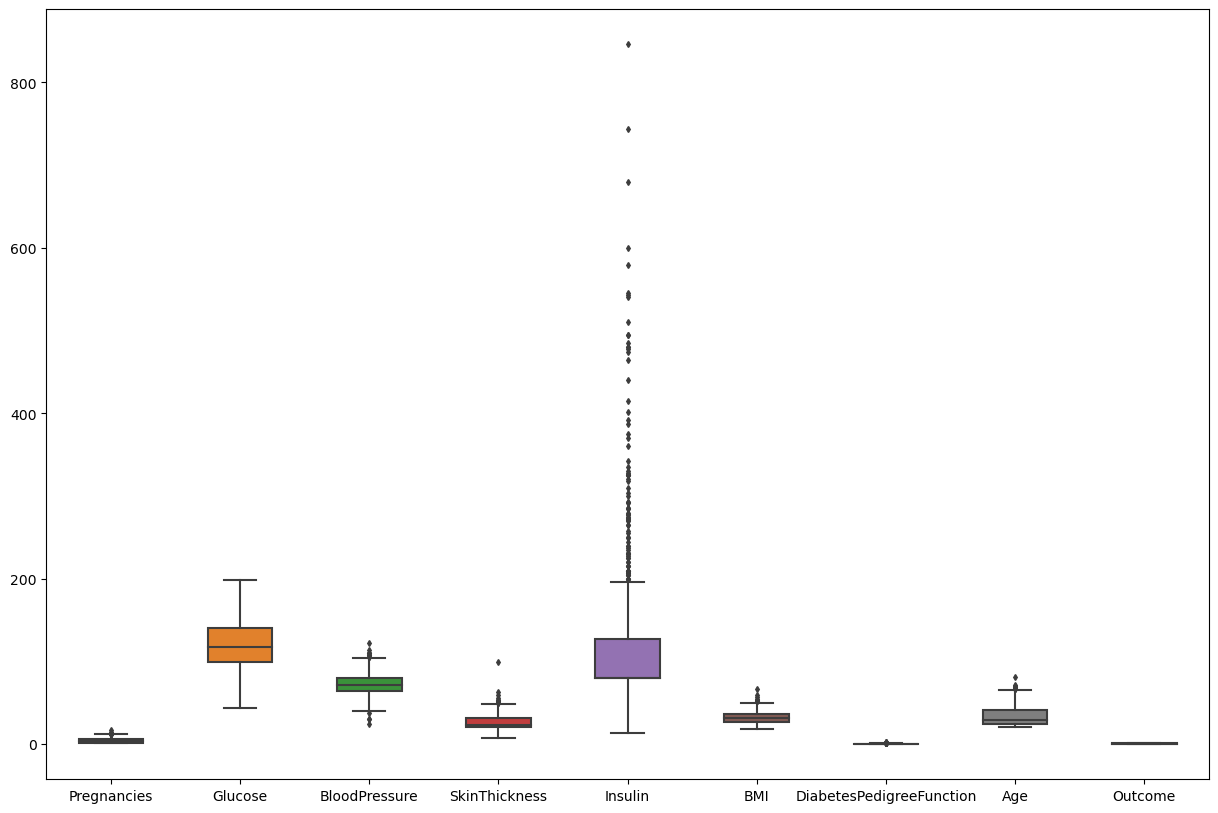

In [85]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width=0.5,ax=ax,fliersize=3)

In [86]:
# Q3.

In [87]:
# Segregate the dependent and independent features
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [91]:
# Q4.

from sklearn.tree import DecisionTreeClassifier

In [92]:
classifier = DecisionTreeClassifier(criterion='entropy')

In [93]:
classifier.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.509765625, 0.9705882352941176, 'x[1] <= 0.725\nentropy = 0.93\nsamples = 576\nvalue = [377, 199]'),
 Text(0.17907072368421054, 0.9117647058823529, 'x[5] <= -0.868\nentropy = 0.788\nsamples = 454\nvalue = [347, 107]'),
 Text(0.06578947368421052, 0.8529411764705882, 'x[1] <= 0.359\nentropy = 0.177\nsamples = 113\nvalue = [110, 3]'),
 Text(0.039473684210526314, 0.7941176470588235, 'x[4] <= -0.742\nentropy = 0.078\nsamples = 104\nvalue = [103, 1]'),
 Text(0.02631578947368421, 0.7352941176470589, 'x[4] <= -0.763\nentropy = 0.544\nsamples = 8\nvalue = [7, 1]'),
 Text(0.013157894736842105, 0.6764705882352942, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.039473684210526314, 0.6764705882352942, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05263157894736842, 0.7352941176470589, 'entropy = 0.0\nsamples = 96\nvalue = [96, 0]'),
 Text(0.09210526315789473, 0.7941176470588235, 'x[2] <= 0.071\nentropy = 0.764\nsamples = 9\nvalue = [7, 2]'),
 Text(0.07894736842105263, 0.7352

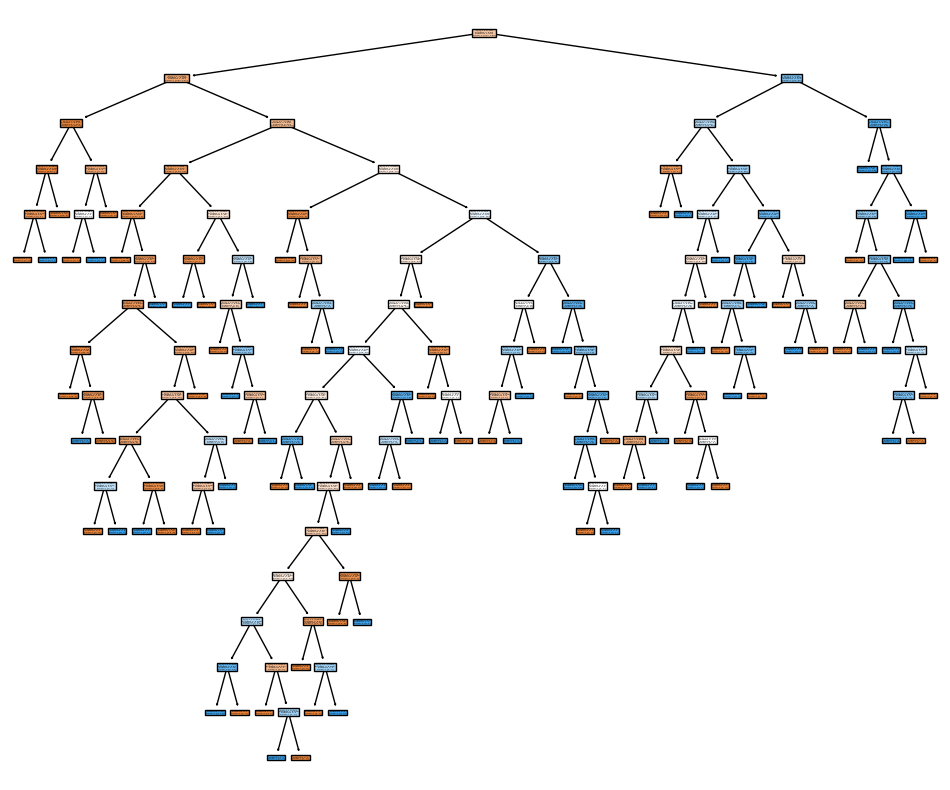

In [94]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [97]:
# Decision Tree Pre-prunning and using cross-validation to tune Hyperparameter and avoid overfitting.

In [98]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
parameter = {    
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'max_features':['auto','sqrt','log2']
}

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
classifier = DecisionTreeClassifier()

In [102]:
clf = GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')

In [103]:
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [104]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [105]:
clf.best_score_

0.7447226386806596

In [123]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2', splitter='best')

In [124]:
classifier.fit(X_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2')

[Text(0.5079787234042553, 0.9166666666666666, 'x[7] <= -0.385\nentropy = 0.93\nsamples = 576\nvalue = [377, 199]'),
 Text(0.2765957446808511, 0.75, 'x[1] <= 0.193\nentropy = 0.685\nsamples = 280\nvalue = [229, 51]'),
 Text(0.11702127659574468, 0.5833333333333334, 'x[7] <= -0.906\nentropy = 0.374\nsamples = 208\nvalue = [193, 15]'),
 Text(0.0425531914893617, 0.4166666666666667, 'x[5] <= 0.158\nentropy = 0.174\nsamples = 77\nvalue = [75, 2]'),
 Text(0.02127659574468085, 0.25, 'entropy = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(0.06382978723404255, 0.25, 'x[6] <= 0.15\nentropy = 0.523\nsamples = 17\nvalue = [15, 2]'),
 Text(0.0425531914893617, 0.08333333333333333, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.0851063829787234, 0.08333333333333333, 'entropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.19148936170212766, 0.4166666666666667, 'x[3] <= 1.547\nentropy = 0.467\nsamples = 131\nvalue = [118, 13]'),
 Text(0.14893617021276595, 0.25, 'x[1] <= -0.506\nentropy = 0.387\

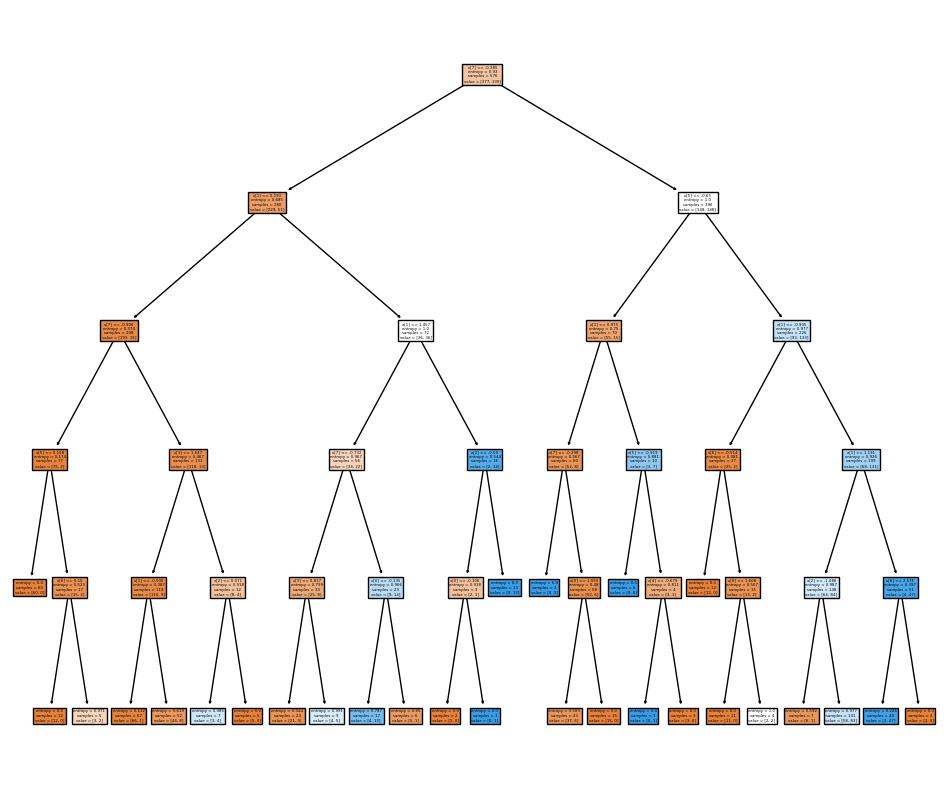

In [125]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [126]:
y_pred = clf.predict(X_test_scaled)

In [127]:
# Q5.

In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [129]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.7135416666666666
Precision: 0.64
Recall: 0.463768115942029
F1 Score: 0.5378151260504201


In [130]:
y_prob = clf.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test,y_prob)
roc_auc = roc_auc_score(y_test,y_prob)

In [131]:
# Visualization

In [132]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix')

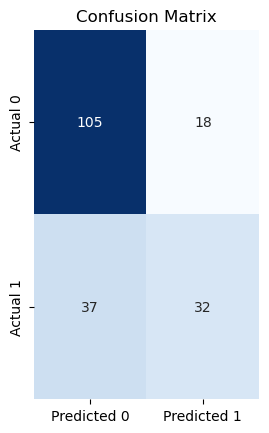

In [133]:
# Confusion Matrix

plt.subplot(1,2,1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
           xticklabels=['Predicted 0', 'Predicted 1'],
           yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')

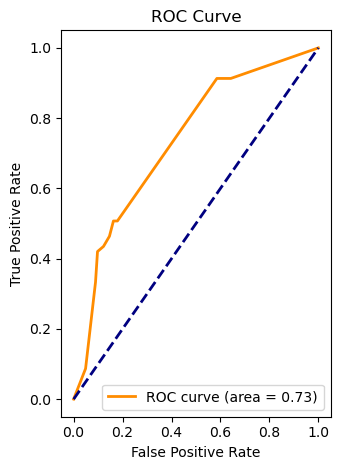

In [134]:
# ROC Curve
plt.subplot(1,2,2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], color = 'navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [136]:
# Q6.

"""
Root Node: The root node is the starting point of the decision tree. It tests a condition on feature x[7] (seventh feature) and makes a decision based on whether it is less than or equal to -0.385.

Root Split: If x[7] is less than or equal to -0.385, the model goes to the left branch. Otherwise, it goes to the right branch.
Left Branch: This branch further splits based on the condition that x[1] (second feature) is less than or equal to 0.193.

If x[1] is less than or equal to 0.193, it goes to the left subtree.
If x[1] is greater than 0.193, it goes to the right subtree.

Left Subtree:

In this subtree, the model makes additional splits based on different conditions, including features x[7], x[5], x[6], and x[3].

Right Branch (of Root):

If x[7] is greater than -0.385, the model goes to the right subtree, which further splits based on the condition that x[5] is less than or equal to -0.65.

Right Subtree:

In this subtree, the model makes additional splits based on features x[1], x[7], x[3], x[0], x[2], and x[6].

Leaf Nodes:

The terminal nodes or leaves contain the final predicted outcomes. Each leaf node provides a class label and the number of samples falling into that leaf.
Important Variables and Thresholds:

The decision tree indicates the importance of different features based on their placement in the tree and the number of samples affected by the splits.
For example, x[7] (seventh feature) is used at the root, suggesting it plays a crucial role in the initial decision.
Other important features include x[1], x[5], x[6], x[3], x[0], and x[2], depending on where they appear in the tree.

Interpretation:
The decision tree captures complex relationships between input features and the target variable (possibly diabetes).
It's important to note that without knowledge of the specific features (x[0], x[1], ..., x[7]) and the corresponding dataset, it's challenging to provide precise domain-specific interpretations.
The tree seems to be addressing non-linear relationships and interactions between features in making predictions.

"""

"\nRoot Node: The root node is the starting point of the decision tree. It tests a condition on feature x[7] (seventh feature) and makes a decision based on whether it is less than or equal to -0.385.\n\nRoot Split: If x[7] is less than or equal to -0.385, the model goes to the left branch. Otherwise, it goes to the right branch.\nLeft Branch: This branch further splits based on the condition that x[1] (second feature) is less than or equal to 0.193.\n\nIf x[1] is less than or equal to 0.193, it goes to the left subtree.\nIf x[1] is greater than 0.193, it goes to the right subtree.\n\nLeft Subtree:\n\nIn this subtree, the model makes additional splits based on different conditions, including features x[7], x[5], x[6], and x[3].\n\nRight Branch (of Root):\n\nIf x[7] is greater than -0.385, the model goes to the right subtree, which further splits based on the condition that x[5] is less than or equal to -0.65.\n\nRight Subtree:\n\nIn this subtree, the model makes additional splits based

In [137]:
#Q7.

# Here's how I would do check the robustness of the model to changes in the dataset or the environment if I would have new data.

# Validation with New Data:
#Use a separate dataset (not used for training) to evaluate the model's performance. Check metrics like accuracy, precision, recall, and F1-score.
#Ensure that the new data represents the same distribution as the training data.

#Sensitivity Analysis:
#Evaluate the model's sensitivity to changes in input features. Gradually perturb the input features and observe the impact on predictions.
#For example, vary the values of x[7], x[1], x[5], etc., and observe changes in predicted outcomes.
# Assess whether small changes in input features lead to significant changes in predictions.

#Scenario Testing:
#Test the model under different scenarios or conditions that may not have been well-represented in the training data.
#Create scenarios that represent extreme or unusual cases.
#Evaluate how the model performs in scenarios where certain features deviate significantly from their typical values.

#Cross-Validation:
#If not done during model training, consider using cross-validation to assess the model's stability and generalization performance.

#Parameter Tuning:
#Adjust hyperparameters of the decision tree model, such as the maximum depth, minimum samples per leaf, etc., and observe changes in model performance.

#Domain Expert Feedback:
#Seek feedback from domain experts to validate whether the model's predictions align with their expectations and domain knowledge.

# By combining these techniques, I would gain a comprehensive understanding of the decision tree model's behavior and robustness in different situations.